# Titanic - ML from disaster

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(13)

In [2]:
# Import training and test sets
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

# Review dataset
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Drop columns deemed arbitrary
train = train_set.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
test = test_set.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)

In [5]:
# Review shape of training data
train.shape

(891, 8)

In [6]:
# Review shape of test data
test.shape

(418, 8)

In [7]:
# Set target variable and remove target from input data.

train_y = train[['Survived']]
test_y = test[['Survived']]

train_inputs = train.drop(['Survived'], axis=1)
test_inputs = test.drop(['Survived'], axis=1)

In [8]:
test_inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [10]:
# Reveiw training dataset
train_inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
# Review column types
train_inputs.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [62]:
train_inputs['Pclass']=train_inputs['Pclass'].astype('object')
test_inputs['Pclass']=test_inputs['Pclass'].astype('object')

In [13]:
train_inputs.dtypes

Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [15]:
# Confirm numeric cols
numeric_columns

['Age', 'SibSp', 'Parch', 'Fare']

In [16]:
# Confirm cat cols
categorical_columns

['Pclass', 'Sex', 'Embarked']

In [17]:
# Create numeric pipeline with Standard Scaler
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [18]:
# Create cat pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
# Create preprocessor with Standard Scaler
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
        remainder='drop')

In [20]:
# Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)
train_x.shape

(891, 13)

In [63]:
#Fit and transform the test data
test_x = preprocessor.transform(test_inputs)

test_x.shape

(418, 13)

In [22]:
train_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [64]:
# Determine a baseline accuracy using most frequent stra

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(train_x, train_y)

DummyClassifier(strategy='most_frequent')

In [65]:
# Baseline Train Accuracy
dummy_train_pred = dummy_clf.predict(train_x)

baseline_train_acc = accuracy_score(train_y, dummy_train_pred)

print('Baseline Train Accuracy: {}' .format(baseline_train_acc))

Baseline Train Accuracy: 0.6161616161616161


In [66]:
# Baseline Test Accuracy
dummy_test_pred = dummy_clf.predict(test_x)

baseline_test_acc = accuracy_score(test_y, dummy_test_pred)

print('Baseline Test Accuracy: {}' .format(baseline_test_acc))

Baseline Test Accuracy: 0.6363636363636364


In [67]:
train_x.shape

(891, 13)

In [68]:
train_x2 = pd.DataFrame(train_x, columns=preprocessor.get_feature_names_out())

train_x2

,num__Age,num__SibSp,num__Parch,num__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,-0.592481,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.407926,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,-0.823344,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
888,0.000000,0.432793,2.008933,-0.176263,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
889,-0.284663,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Random Forest Model with Feature Importance Chart

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 1) num__Fare                      0.210547
 2) num__Age                       0.198132
 3) cat__Sex_female                0.181618
 4) cat__Sex_male                  0.161426
 5) cat__Pclass_3                  0.060979
 6) num__SibSp                     0.053625
 7) num__Parch                     0.040753
 8) cat__Pclass_1                  0.034961
 9) cat__Pclass_2                  0.020716
10) cat__Embarked_S                0.017446
11) cat__Embarked_C                0.011836
12) cat__Embarked_Q                0.007904
13) cat__Embarked_unknown          0.000059


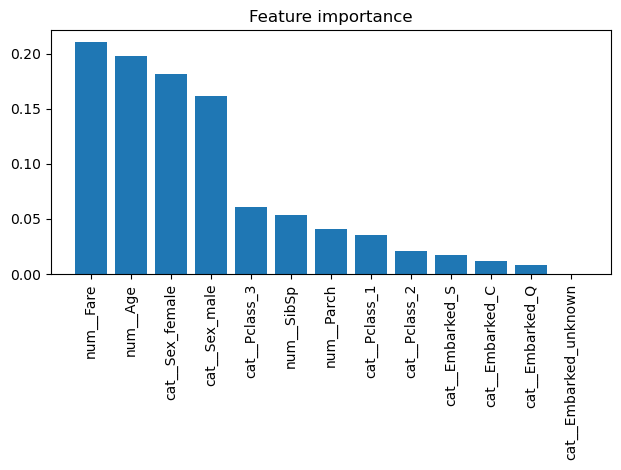

In [69]:
# Now let's try a RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt

feat_labels = train_x2.columns

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, n_jobs=-1) 

rnd_clf.fit(train_x2, train_y)

importances = rnd_clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_x2.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(train_x2.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(train_x2.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, train_x2.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [70]:
train_y_pred = rnd_clf.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.9382716049382716


C:\Users\chadu\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [71]:
test_y_pred = rnd_clf.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.8373205741626795


C:\Users\chadu\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# KNN Model with Features/Model Accuracy Chart

### First, create Sequential feature selection algorithms

In [72]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split

In [73]:
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        train_x, test_x, train_y, test_y = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = train_x.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(train_x, train_y, 
                                 test_x, test_y, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(train_x, train_y, 
                                         test_x, test_y, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, train_x, train_y, test_x, test_y, indices):
        self.estimator.fit(train_x[:, indices], train_y)
        y_pred = self.estimator.predict(test_x[:, indices])
        score = self.scoring(test_y, y_pred)
        return score

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

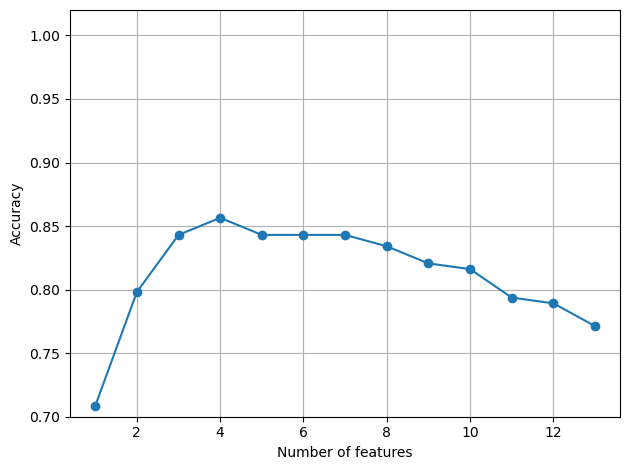

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(train_x, train_y)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

# Alternate Scalers in the pipeline

In [75]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [76]:
# Create numeric pipeline with MaxAbsScaler
numeric_transformerABS = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', MaxAbsScaler())])

In [77]:
# Create numeric pipeline RobustScaler
numeric_transformerRBST = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', RobustScaler())])

In [78]:
# Create ABS preprocessor
preprocessorABS = ColumnTransformer([
        ('num', numeric_transformerABS, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
        remainder='drop')

In [79]:
# Create RBST preprocessor
preprocessorRBST = ColumnTransformer([
        ('num', numeric_transformerRBST, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
        remainder='drop')

In [80]:
# Fit and transform the train and test data with Standard Scaler
train_x = preprocessor.fit_transform(train_inputs)
test_x = preprocessor.transform(test_inputs)

In [81]:
# Fit and transform the train data Robust Scaler
train_xRBST = preprocessorRBST.fit_transform(train_inputs)
test_xRBST = preprocessorRBST.transform(test_inputs)

In [82]:
# Fit and transform the train data with Max Absolute Scaler
train_xABS = preprocessorABS.fit_transform(train_inputs)
test_xABS = preprocessorABS.transform(test_inputs)

# SVC Model 

In [83]:
from sklearn.svm import SVC

LSVC = SVC(kernel="linear")
LSVC2 = SVC(kernel="linear")
LSVC3 = SVC(kernel="linear")

LSVC.fit (train_x, train_y)
LSVC2.fit (train_xABS, train_y)
LSVC3.fit (train_xRBST, train_y)

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chadu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [86]:
train_x

array([[-0.5924806 ,  0.43279337, -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.63878901,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2846632 , -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.2846632 , -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17706291, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ]])

In [87]:
train_xABS

array([[0.275     , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.475     , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.325     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.37123897, 0.125     , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.325     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [88]:
train_xRBST

array([[-0.59223982,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.63852941,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28454751,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  2.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.28454751,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17699095,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [84]:
train_y_pred = LSVC.predict(train_x)
train_acc = accuracy_score(train_y, train_y_pred)
train_y_pred2 = LSVC2.predict(train_xABS)
train_acc2 = accuracy_score(train_y, train_y_pred2)
train_y_pred3 = LSVC3.predict(train_xRBST)
train_acc3 = accuracy_score(train_y, train_y_pred3)

print('Train acc Std Scaler: {}' .format(train_acc))
print('Train acc MaxAbsScaler: {}' .format(train_acc2))
print('Train acc RobustScaler: {}' .format(train_acc3))

Train acc Std Scaler: 0.7867564534231201
Train acc MaxAbsScaler: 0.7867564534231201
Train acc RobustScaler: 0.7867564534231201


In [85]:
test_y_pred = LSVC.predict(test_x)
test_acc = accuracy_score(test_y, test_y_pred)
test_y_pred2 = LSVC.predict(test_xABS)
test_acc2 = accuracy_score(test_y, test_y_pred2)
test_y_pred3 = LSVC.predict(test_xRBST)
test_acc3 = accuracy_score(test_y, test_y_pred3)

print('Test acc Std Scaler: {}' .format(test_acc))
print('Test acc MaxAbsScaler: {}' .format(test_acc2))
print('Test acc RobustScaler: {}' .format(test_acc3))

Test acc Std Scaler: 1.0
Test acc MaxAbsScaler: 1.0
Test acc RobustScaler: 1.0


## SVC Poly

In [34]:
from sklearn.svm import SVC
PSVC = SVC(kernel="poly", degree=3, coef0=1, C=.1)
PSVC.fit (train_x, train_y)

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, coef0=1, kernel='poly')

In [35]:
train_y_pred = PSVC.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.8338945005611672


In [36]:
test_y_pred = PSVC.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.9569377990430622


## SVC RBF

In [37]:
rbf_svm = SVC(kernel="rbf", C=2, gamma='scale')

rbf_svm.fit(train_x, train_y)

C:\Users\chadu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2)

In [38]:
train_y_pred = rbf_svm.predict(train_x)
train_acc = accuracy_score(train_y, train_y_pred)
print('Train acc: {}' .format(train_acc))

Train acc: 0.8462401795735129


In [39]:
test_y_pred = rbf_svm.predict(test_x)
test_acc = accuracy_score(test_y, test_y_pred)
print('Test acc: {}' .format(test_acc))

Test acc: 0.9019138755980861
